## Import 

In [1]:
import pandas as pd               # primary data structure library
import numpy as np                # library scientific computing in python 
import matplotlib.pyplot as plt   # for plotting 
from wordcloud import WordCloud   # for plot word cloud 
import folium                     # for geospatial plot
from folium import plugins        # for using plugins in folium
%matplotlib inline
pd.set_option("display.max.columns",None) # set to see all columns dataframe 

## Read data and Preprocessing

In [2]:
london = pd.read_csv('dataset/london_crime_by_lsoa.csv') # read csv data
london.head()                                            # show first 5 of london dataframe

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [3]:
london.shape # how many rows and columns in london dataframe

(13490604, 7)

In [4]:
london.info() # show the columns name and their data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [5]:
london.isnull().sum() # check there is NaN or not

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [6]:
london['borough'].unique() # get unique value of borough

array(['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth',
       'Ealing', 'Hounslow', 'Newham', 'Sutton', 'Haringey', 'Lambeth',
       'Richmond upon Thames', 'Hillingdon', 'Havering',
       'Barking and Dagenham', 'Kingston upon Thames', 'Westminster',
       'Hackney', 'Enfield', 'Harrow', 'Lewisham', 'Brent', 'Southwark',
       'Barnet', 'Waltham Forest', 'Camden', 'Bexley',
       'Kensington and Chelsea', 'Islington', 'Tower Hamlets',
       'Hammersmith and Fulham', 'Merton', 'City of London'], dtype=object)

In [7]:
london['major_category'].unique() # get unique value of major category

array(['Burglary', 'Violence Against the Person', 'Robbery',
       'Theft and Handling', 'Criminal Damage', 'Drugs',
       'Fraud or Forgery', 'Other Notifiable Offences', 'Sexual Offences'],
      dtype=object)

In [8]:
london['minor_category'].unique() # get unique value of minor category

array(['Burglary in Other Buildings', 'Other violence',
       'Personal Property', 'Other Theft', 'Offensive Weapon',
       'Criminal Damage To Other Building', 'Theft/Taking of Pedal Cycle',
       'Motor Vehicle Interference & Tampering',
       'Theft/Taking Of Motor Vehicle', 'Wounding/GBH',
       'Other Theft Person', 'Common Assault', 'Theft From Shops',
       'Possession Of Drugs', 'Harassment', 'Handling Stolen Goods',
       'Criminal Damage To Dwelling', 'Burglary in a Dwelling',
       'Criminal Damage To Motor Vehicle', 'Other Criminal Damage',
       'Counted per Victim', 'Going Equipped', 'Other Fraud & Forgery',
       'Assault with Injury', 'Drug Trafficking', 'Other Drugs',
       'Business Property', 'Other Notifiable', 'Other Sexual',
       'Theft From Motor Vehicle', 'Rape', 'Murder'], dtype=object)

In [9]:
london['year'].unique() # get unique value of year, expected 2008 - 2016

array([2016, 2015, 2008, 2012, 2010, 2013, 2014, 2011, 2009], dtype=int64)

In [10]:
london['month'].unique() # get unique value of month, expected range 1-12

array([11,  5,  3,  6,  7,  4,  9,  8, 12,  1, 10,  2], dtype=int64)

In [11]:
london['value'].unique() # get unique value of value (count of crimes happen)

array([  0,   1,   2,   3,   4,   9,   5,   6,   7,  10,  18,  11,  16,
         8,  72,  12,  53,  14,  19,  15,  17,  20,  43,  50,  37,  57,
        21,  13,  80,  25,  28,  22,  58,  33,  29,  38,  88,  23, 111,
        40,  39,  60,  26,  48,  32,  66, 122,  47,  30, 118,  75,  54,
        51,  67,  45,  35,  24, 117,  27,  68,  99,  65,  84,  34,  55,
        81, 112, 119,  71, 113,  36,  61,  46,  31,  59,  44, 149,  49,
       241, 104,  69,  77,  41,  64,  42, 167,  73,  74, 165, 107,  86,
        52,  63,  79, 103, 106,  70,  90,  91, 148, 130,  62, 136,  98,
        92, 141,  78,  82,  56, 194, 168, 152, 204, 114, 153, 116, 157,
       131, 120,  96, 101,  97,  95, 309, 142,  87, 146, 195,  93, 166,
       144,  94, 161, 135, 170,  76, 127, 210,  83, 150, 186, 156, 124,
        85, 174, 221, 163, 109, 110,  89, 115, 138, 140, 121, 139, 105,
       129, 177, 237, 235, 226, 199, 240, 189, 280, 100, 102, 288, 134,
       244, 211, 158, 187, 137, 123, 164, 108, 224, 201, 233, 13

In [12]:
# get data that just crimes happen only (value = 0 means there is no crime happen)
crimes_only = london[london['value'] != 0] 

In [13]:
# dataframe with value not 0
crimes_only

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
...,...,...,...,...,...,...,...
13490581,E01000789,Bromley,Violence Against the Person,Harassment,3,2009,12
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490592,E01033327,Lewisham,Violence Against the Person,Common Assault,2,2013,7


## Questions

### Q: What were the top 5 borough in London with the most crimes from 2008-2016?

In [14]:
# group data by borough and sum the value then sorting by the value ascending (sum of the value)
borough_crimes = crimes_only.groupby('borough')['value'].sum().sort_values()

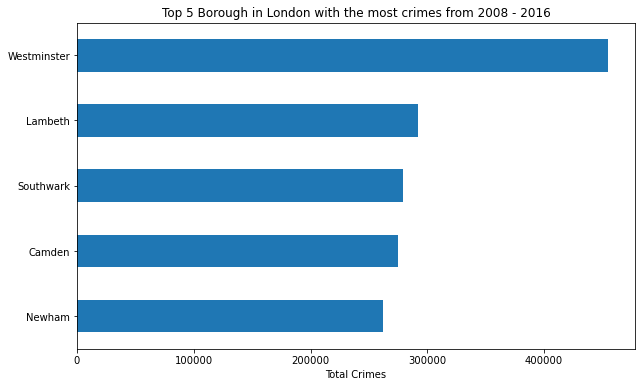

In [15]:
# get last 5 borough and their value (sum of the value) and plot to bar (horizontal) chart
borough_crimes.tail().plot(kind='barh', figsize=(10,6))
plt.title('Top 5 Borough in London with the most crimes from 2008 - 2016') 
plt.ylabel('')                                                             
plt.xlabel('Total Crimes')                                                 
plt.show()                                                                 

Berdasarkan visualisasi di atas dapat dilihat bahwa wilayah Westminster merupakan wilayah yang paling sering terjadi kejahatan dengan total lebih dari 400 ribu dari tahun 2008-2016. Kemudian diikuti oleh Lambeth, Southwark, Camden, dan Newham dengan range 200-300 ribu untuk masing-masing wilayah. Antara Westminster dengan keempat wilayah di bawahnya memiliki range yang cukup jauh yaitu sekitar 100 ribuan kasus kejahatan. Setalah dicari tau, berdasarkan [visitlondon](https://www.visitlondon.com/things-to-do/london-areas/westminster) Westminster merupakan wilayah yang memiliki banyak atraksi pengunjung dan landmark bersejarah yang mengundang banyak orang sehingga sangat memungkinkan terjadi banyaknya kejahatan.

### Q: What is the most happen major category crime that happen in the top 5 boroughs with the most crimes?

In [16]:
# get the data where borough is Westminster and group it by major category 
# and sum the value and sort
major_westminster = crimes_only[
    (crimes_only['borough'] == 'Westminster')
].groupby('major_category')['value'].sum().sort_values(ascending=False)

In [17]:
# get the data where borough is Lambeth and group it by major category 
# and sum the value and sort
major_lambeth = crimes_only[
    (crimes_only['borough'] == 'Lambeth')
].groupby('major_category')['value'].sum().sort_values(ascending=False)

In [18]:
# get the data where borough is Southwark and group it by major category 
# and sum the value and sort
major_southwark = crimes_only[
    (crimes_only['borough'] == 'Southwark')
].groupby('major_category')['value'].sum().sort_values(ascending=False)

In [19]:
# get the data where borough is Camden and group it by major category 
# and sum the value and sort
major_camden = crimes_only[
    (crimes_only['borough'] == 'Camden')
].groupby('major_category')['value'].sum().sort_values(ascending=False)

In [20]:
# get the data where borough is Newham and group it by major category 
# and sum the value and sort
major_newham = crimes_only[
    (crimes_only['borough'] == 'Newham')
].groupby('major_category')['value'].sum().sort_values(ascending=False)

In [21]:
def grouped_category(series):
    """
        Function for grouping the category into simpler category
        
        parameter
        ---------
            series: series of category
        
        return
        ---------
            simpler grouped category
    """
    others = 0                        # initialize variable other with 0 
    grouped = pd.Series(dtype=int)    # initialize new series to save the new category 
    
    for idx, val in series.items():   # looping through series
        
        # if the value is less than the quantile(0.5) of value ...
        if val < series.quantile(0.5): 
            # ... then add the value to the "other" variable
            others += int(val) 
        else:
            # else, add the value (with index) to the new series
            grouped[idx] = int(val)
            
    # add value of "Others" to the new seies
    grouped['Others'] = int(others)
    # rename the series into "Total"
    grouped.rename("Total")
    
    return grouped

In [22]:
# apply function grouped_category into major_westminster, major_lambeth, 
# major_southwark, major_camden, major_newham
pie_westminster = grouped_category(major_westminster)
pie_lambeth = grouped_category(major_lambeth)
pie_southwark = grouped_category(major_southwark)
pie_camden = grouped_category(major_camden)
pie_newham = grouped_category(major_newham)

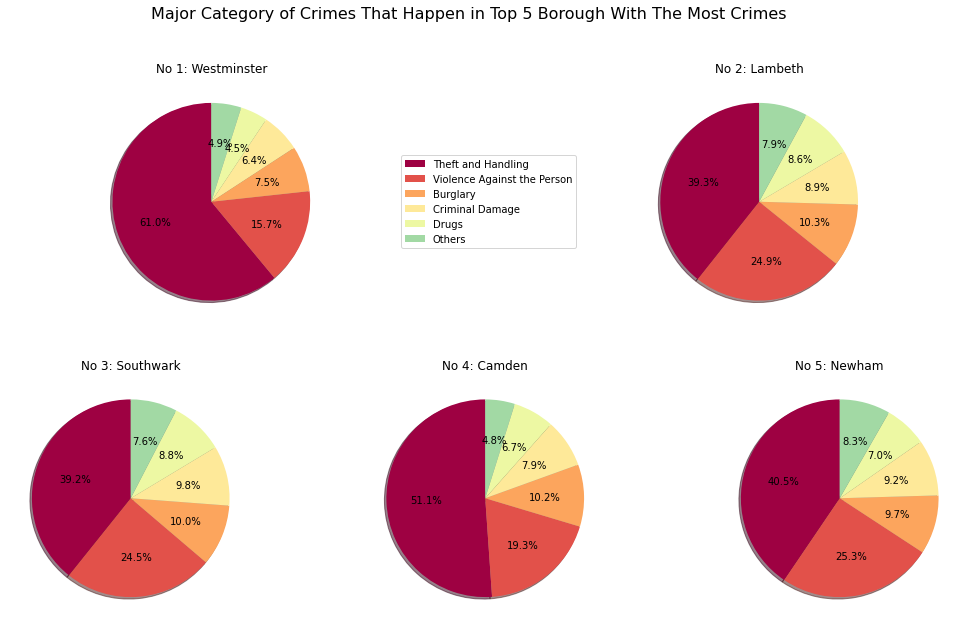

In [23]:
# initialize new figure object and set colors
fig = plt.figure(figsize=(18,10))
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

# subplot 2 rows (first row with 2 columns, second row with 3 columns)
# make first pie plot in first row, first column
ax1 = plt.subplot2grid((2,2), (0, 0))
plt.pie(pie_westminster,colors=colors,autopct='%1.1f%%',startangle=90, shadow=True)
plt.title('No 1: Westminster')

# make second pie plot in first row, second column
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(pie_lambeth,colors=colors,autopct='%1.1f%%',startangle=90, shadow=True)
plt.title('No 2: Lambeth')
 
# make third pie plot in second row, first column
ax1 = plt.subplot2grid((2,3),(1,0))
plt.pie(pie_southwark,colors=colors,autopct='%1.1f%%',startangle=90, shadow=True)
plt.title('No 3: Southwark')

# make fourth pie plot in second row, second column
ax1 = plt.subplot2grid((2,3), (1, 1))
plt.pie(pie_camden,colors=colors,autopct='%1.1f%%',startangle=90, shadow=True)
plt.title('No 4: Camden')

# make fifth pie plot in second row, third column
ax1 = plt.subplot2grid((2,3), (1, 2))
plt.pie(pie_newham,colors=colors,autopct='%1.1f%%',startangle=90, shadow=True)
plt.title('No 5: Newham')

# add super tilte, legend, and show the plot
fig.suptitle('Major Category of Crimes That Happen in Top 5 Borough With The Most Crimes', fontsize=16)
fig.legend(labels=pie_newham.index, loc='upper center', bbox_to_anchor=(0.515,0.78))
plt.show()

Berdasarkan hasil ekplorasi dapat dilihat pada visualisasi di atas bahwa kategori kriminal yang paling banyak terjadi di kelima wilayah sama, yaitu Theft and Handling (Pencurian). Karena kelima wilayah tersebut merupakan lima wilayah dengan kejahatan terbanyak maka dapat disimpulkan bahwa Pencurian merupakan kategori kejahatan yang lazim terjadi di London.

### Q: How is the difference of frequency distribution of the Theft and Handling crimes in 2014 - 2016?

In [24]:
# get the data where major category is Theft and Handling and happen in 2014-2016
# group it by borough and year then sum the value
theft_2014_2016 = crimes_only[
    (crimes_only['major_category'] == 'Theft and Handling') &
    ((crimes_only['year'] == 2016) | (crimes_only['year'] == 2014) | (crimes_only['year'] == 2015))
].groupby(['borough','year'])['value'].sum().reset_index()

In [25]:
# pivot the data theft_2014_2016, borough as index, year as columns, and value (sum of the value) as values
theft_2014_2016 = pd.pivot_table(theft_2014_2016, values ='value', index ='borough', columns ='year')

In [26]:
# show the data after pivot
theft_2014_2016

year,2014,2015,2016
borough,,,
Barking and Dagenham,5289,5177,5607
Barnet,9094,9204,9731
Bexley,4285,4165,4392
Brent,7721,8467,9026
Bromley,7489,7573,7584
Camden,13640,14455,14088
City of London,83,104,129
Croydon,9794,9502,9229
Ealing,9628,9603,10040


In [27]:
# make bin_edges from theft_2014_2016
count, bin_edges = np.histogram(theft_2014_2016)
print(count)
print(bin_edges)

[ 3 21 25 32 14  1  0  0  0  3]
[   83.   2889.1  5695.2  8501.3 11307.4 14113.5 16919.6 19725.7 22531.8
 25337.9 28144. ]


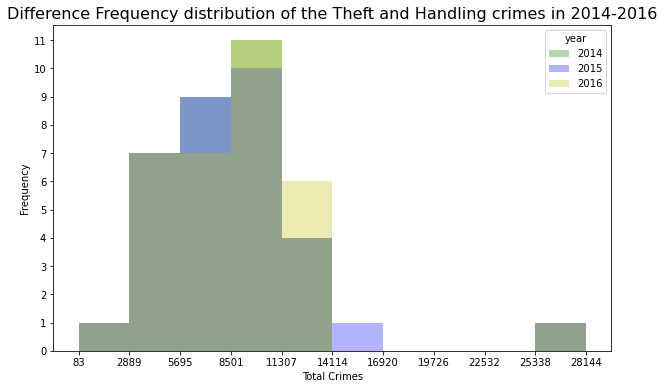

In [28]:
# plot data to histrogram, with xticks from bin_edges, transparancy with alpha 0.3, and color bgr
theft_2014_2016.plot(kind='hist', figsize=(10,6), xticks=bin_edges, yticks=[x for x in range(0,12)], alpha=0.3, color='gby')
plt.title('Difference Frequency distribution of the Theft and Handling crimes in 2014-2016', fontsize=16) 
plt.xlabel('Total Crimes') 
plt.show() 

Berdasarkan grafik dapat dilihat bahwa distribusi pada rentang tahun 2014-2016 mirip atau tidak terlalu jauh berbeda. Terdapat 1 wilayah di setiap tahunnya yang menerima laporan kejahatan minimum yaitu antara 83 sampai 2889 dan 1 wilayah juga yang menerima laporan kejahatan maksimum yaitu antara 25338 sampai 28144. Mayoritas wilayah mendapatkan laporan kejahatan sebanyak 8501 hingga 11307 di setiap tahunnya pada rentang tahun 2014 sampai 2016.  

### Q: How each minor category of theft and handling compares to the other in their contributions to the total crimes in theft and handling? 

In [29]:
# get the data where major category is Theft and Handling
# group it by minor_category and year then sum the value
minor_of_theft = crimes_only[
    crimes_only['major_category'] == 'Theft and Handling'
].groupby(['minor_category', 'year'])[['value']].sum().reset_index()

In [30]:
# pivot the data minor_of_theft, year as index, minor category as columns, and value (sum of the value) as values
pivot_minor_theft = pd.pivot_table(minor_of_theft, values='value', index='year', columns='minor_category')

In [31]:
pivot_minor_theft

minor_category,Handling Stolen Goods,Motor Vehicle Interference & Tampering,Other Theft,Other Theft Person,Theft From Motor Vehicle,Theft From Shops,Theft/Taking Of Motor Vehicle,Theft/Taking of Pedal Cycle
year,,,,,,,,
2008,2466,3868,99280,24453,76570,32857,28303,15895
2009,1907,4210,95424,27549,68856,36349,24476,20721
2010,1714,4406,103997,29547,69709,36935,24890,19726
2011,2104,4481,113616,36090,69604,36351,26161,20885
2012,1737,5113,132056,46585,68198,36562,22464,21339
2013,1819,4797,115757,44964,63509,36441,20377,18708
2014,1588,7611,108577,30957,52167,40141,21653,17186
2015,1388,10300,107571,33829,50024,42549,21848,16513
2016,1377,11438,103807,34868,51319,46957,26366,18001


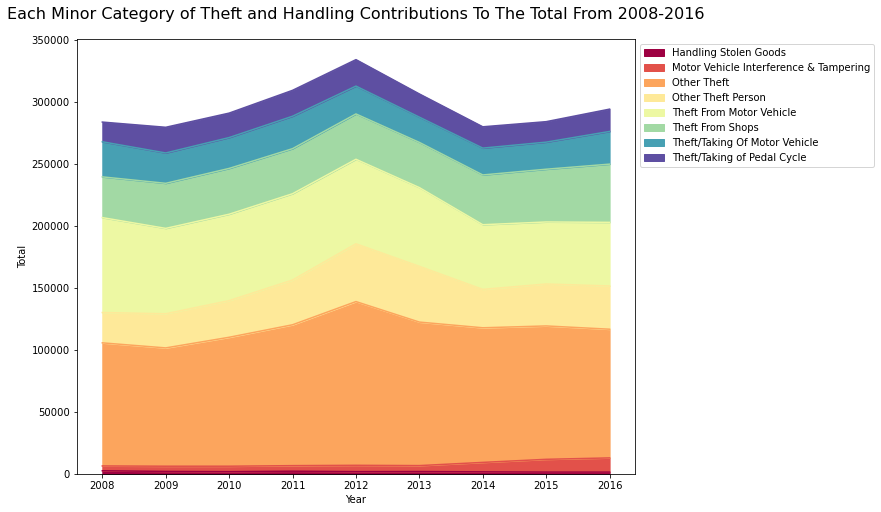

In [32]:
# plot data to area plot and set the colors
pivot_minor_theft.plot(kind='area', figsize=(10,8), color=colors)
plt.title('Each Minor Category of Theft and Handling Contributions To The Total From 2008-2016', fontsize=16, pad=20)
plt.xlabel('Year') 
plt.ylabel('Total')
plt.legend(bbox_to_anchor=(1,1), loc="upper left") 
plt.show()

### Q: How each minor category of violence against the person compares to the other in their contributions to the total crimes in violence against the person?

In [33]:
# get the data where major category is Violence Against the Person
# group it by minor_category and year then sum the value
minor_of_violence = crimes_only[
    crimes_only['major_category'] == 'Violence Against the Person'
].groupby(['minor_category', 'year'])[['value']].sum().reset_index()

In [34]:
# pivot the data minor_of_violence, year as index, minor category as columns, and value (sum of the value) as values
pivot_minor_violence = pd.pivot_table(minor_of_violence, values='value', index='year', columns='minor_category')

In [35]:
pivot_minor_violence

minor_category,Assault with Injury,Common Assault,Harassment,Murder,Offensive Weapon,Other violence,Wounding/GBH
year,,,,,,,
2008,56586,37356,43389,130,5961,7721,8701
2009,55297,39671,43594,119,4520,7571,10005
2010,54173,41591,42808,113,4229,6947,8033
2011,50768,40502,37493,105,3991,6414,7628
2012,50369,39246,43396,95,3134,6623,7151
2013,39929,37882,41805,96,3315,7628,15526
2014,45677,51244,55330,81,3676,7785,21556
2015,48164,61758,71633,109,4144,9501,23431
2016,50038,64440,78676,101,5013,10588,23525


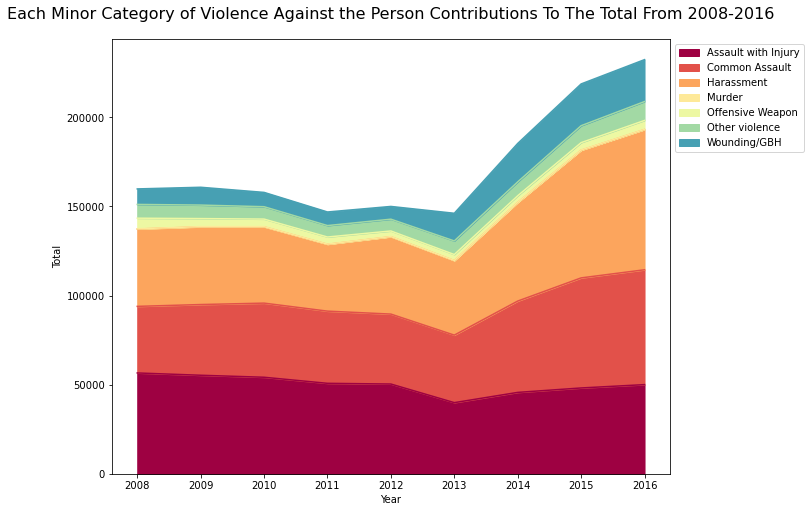

In [36]:
# plot data to area plot and set the colors
pivot_minor_violence.plot(kind='area', figsize=(10,8), color=colors)
plt.title('Each Minor Category of Violence Against the Person Contributions To The Total From 2008-2016', fontsize=16, pad=20)
plt.xlabel('Year') 
plt.ylabel('Total') 
plt.legend(bbox_to_anchor=(1,1), loc="upper left") 
plt.show()

Berdasarkan visualisasi no 4 dan 5 di atas didapatkan bahwa pada kedua kategori kejahatan utama Theft and Handling dan Violence against the person memiliki ketinggian yang hampir sama setiap tahunnya. Sub kejahatan yang paling banyak terjadi di setiap tahunnya pada kategori utama Theft and Handling adalah Other Theft. Sedangkan pada kategori utama Violence Against the Person sedikit berbeda, pada awal 2008 hingga 2012 akhir sub kejahatan Assault with Injury merupakan sub kejahatan yang mayoritas terjadi tetapi pada awal 2013 hingga akhir 2016 sub kejahatan yang banyak terjadi adalah Harassment. 

### Q: How is the distributions of total crime by month (2016) in tourism borough?

Tourism Borough : https://www.parkgrandlondon.com/blog/7-london-boroughs-to-visit-in-2020/

In [37]:
# initialize list of tourism borough
top_tourism = ['Westminster', 'Islington', 'Hackney', 'Kensington and Chelsea', 'City of London', 'Hammersmith and Fulham', 'Southwark']

# get the data where borough in the list of top_tourism and year in 2016 then
# group it by borough and month then sum the value
df_boxplot = crimes_only[
    (crimes_only['borough'].isin(top_tourism)) &
    (crimes_only['year'] == 2016)
].groupby(['borough','month'])['value'].sum().reset_index()

In [38]:
# pivot the data df_boxplot, month as index, borough as columns, and value (sum of the value) as values
df_boxplot = pd.pivot_table(df_boxplot, values='value', index='month', columns='borough')

In [39]:
# show data
df_boxplot

borough,City of London,Hackney,Hammersmith and Fulham,Islington,Kensington and Chelsea,Southwark,Westminster
month,,,,,,,
1,10,2124,1587,2338,1511,2480,4022
2,10,2041,1587,2161,1392,2429,3755
3,12,2226,1653,2091,1531,2476,3703
4,15,2212,1689,2122,1414,2572,3736
5,9,2376,1904,2168,1624,2915,3789
6,8,2625,1749,2487,1637,2681,3785
7,13,2590,1670,2569,1653,2705,4357
8,19,2538,1779,2221,2398,2746,4291
9,19,2423,1630,2099,1709,2792,3773


In [40]:
# show overview basic statistics of df_boxplot
df_boxplot.describe()

borough,City of London,Hackney,Hammersmith and Fulham,Islington,Kensington and Chelsea,Southwark,Westminster
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,14.833333,2355.416667,1681.166667,2257.666667,1631.666667,2636.333333,4027.500000
std,7.094599,183.065045,95.426157,151.102213,259.323011,146.481357,331.939069
min,8.000000,2041.000000,1576.000000,2091.000000,1392.000000,2429.000000,3703.000000
25%,10.000000,2222.500000,1619.250000,2151.250000,1511.750000,2516.000000,3768.500000
50%,12.500000,2365.000000,1661.500000,2230.000000,1599.500000,2642.000000,3905.500000
75%,17.500000,2475.750000,1726.500000,2328.250000,1641.000000,2718.250000,4279.000000
max,34.000000,2625.000000,1904.000000,2569.000000,2398.000000,2915.000000,4751.000000


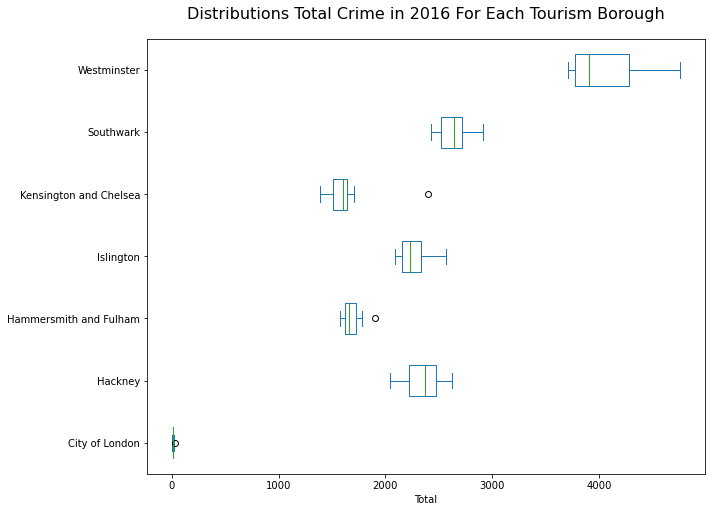

In [41]:
# plot into boxplot horizontal
df_boxplot.plot(kind='box', figsize=(10,8), vert=False)
plt.title('Distributions Total Crime in 2016 For Each Tourism Borough', fontsize=16, pad=20) 
plt.xlabel('Total') 
plt.show()

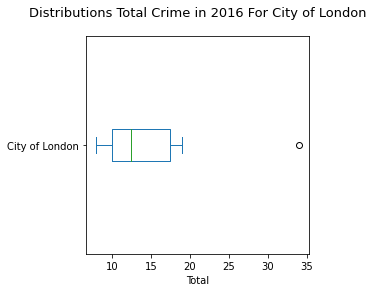

In [42]:
# because in the first boxplot doesn't show City of London much, so make box plot only for that borough 
df_boxplot['City of London'].plot(kind='box', figsize=(4,4), vert=False)
plt.title('Distributions Total Crime in 2016 For City of London', fontsize=13, pad=20) 
plt.xlabel('Total') 
plt.show()

Berdasrkan boxplot di atas didapatkan informasi sebagai berikut:
1. Dari ketujuh wilayah tourism tersebut, dengan jelas dapat diidentifikasi wilayah yang memiliki total kejahatan lebih tinggi dibandingkan dengan yang lain. Westminster memiliki total kejahatan paling tinggi sementara City of London memiliki total kejahatan yang terendah.
2. Total kejahatan di Hackney, Islington (jika mengabaikan whiskernya yang agak memanjang) hampir merata diseluruh rentang, sementara City of London, Westminster, dan Hammersmith and Fullham right skewed, Southwark dan Kensington and Chelsea left skewed
3. Variasi total kejahatan setiap bulannya di tahun 2016 paling sedikit pada wilayah City of London dan paling banyak variasinya pada wilayah Westminster.
4. Terdapat outlier pada City of London, Hammersmith and Fullham, dan Kensington and Chelsea

### Q: How is the movement of crime rate from 2012 to 2016?

In [43]:
# get total of crimes happen in London from 2012-2016
total_2016 = crimes_only[crimes_only['year'] == 2016]['value'].sum()
total_2015 = crimes_only[crimes_only['year'] == 2015]['value'].sum()
total_2014 = crimes_only[crimes_only['year'] == 2014]['value'].sum()
total_2013 = crimes_only[crimes_only['year'] == 2013]['value'].sum()
total_2012 = crimes_only[crimes_only['year'] == 2012]['value'].sum()

In [44]:
def pop_in_million(population):
    """
        Function for change population into million format
        
        parameter
        ---------
            population: number of population
        
        return
        ---------
            population in million format
    """
    return population*1000000

Source of Population in London from 2012 - 2016 : https://www.ukpopulation.org/london-population/

In [45]:
# create dataframe contain reported crime, total population of London from year to year (2012-2016)
df_crime_rate = pd.DataFrame(
    data=[{'reported_crime':total_2012, 'population':pop_in_million(8.30)},
          {'reported_crime':total_2013, 'population':pop_in_million(8.41)},
          {'reported_crime':total_2014, 'population':pop_in_million(8.52)},
          {'reported_crime':total_2015, 'population':pop_in_million(8.67)},
          {'reported_crime':total_2016, 'population':pop_in_million(8.69)}], 
    index=[year for year in range(2012,2017)]
)
df_crime_rate

,reported_crime,population
2012,737329,8300000.0
2013,686407,8410000.0
2014,680183,8520000.0
2015,711624,8670000.0
2016,736121,8690000.0


A crime rate describes the number of crimes reported to law enforcement agencies per 100,000 total population.

In [46]:
# calculate crime rate
df_crime_rate['crime_rate'] = (df_crime_rate['reported_crime']/df_crime_rate['population'])*100000
df_crime_rate = df_crime_rate.reset_index()

In [47]:
df_crime_rate

,index,reported_crime,population,crime_rate
0,2012,737329,8300000.0,8883.481928
1,2013,686407,8410000.0,8161.795482
2,2014,680183,8520000.0,7983.368545
3,2015,711624,8670000.0,8207.889273
4,2016,736121,8690000.0,8470.897583


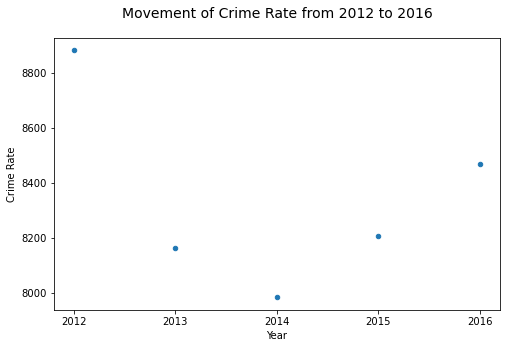

In [48]:
# plot the data into scatter plot with x is index(year), y is the crime rate
df_crime_rate.plot(kind='scatter', x='index', y='crime_rate', figsize=(8,5), xticks=df_crime_rate['index'])
plt.title('Movement of Crime Rate from 2012 to 2016', fontsize=14, pad=20) 
plt.xlabel('Year')
plt.ylabel('Crime Rate')
plt.show()

Berdasarkan scatter plot di atas pergerakan tingkat kriminalitas di London turun pada 2013 dan 2014 tetapi kembali naik pada tahun 2015 dan 2016. Tingkat kriminalitas tertinggi dari tahun 2012-2016 ada pada tahun 2012

### Q : What were the top borough with the most murder crime from 2008-2016?

In [49]:
# get the data where minor category is Murder and then group it by borough and sum the value
murder_only = crimes_only[
    crimes_only['minor_category'] == 'Murder'
].groupby(['borough'])[['value']].sum()

In [50]:
# create a string containing borough that is repeated as many times as a sum of the value

word_string = '' # initialize word_string, it is used as container for the string

for idx, val in zip(murder_only.index.values, murder_only['value']): # looping through index and value of murder_only
    
    split_str = idx.split(' ') # split the borough (index)
    
    # if length of split string more than one (two words or more)...
    if len(split_str) > 1:
        # ... then the splitted string will be joined without space
        idx = ''.join(split_str)
        
    # add the idx/joined string (for len(split) > 1) to word_string as much as the value
    word_string += (idx + ' ') * val

In [51]:
# show the combined string
word_string

'BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham BarkingandDagenham Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent 

In [52]:
# create the word cloud from word_string
wordcloud = WordCloud(background_color='white', collocations=False, width=800, height=400).generate(word_string)

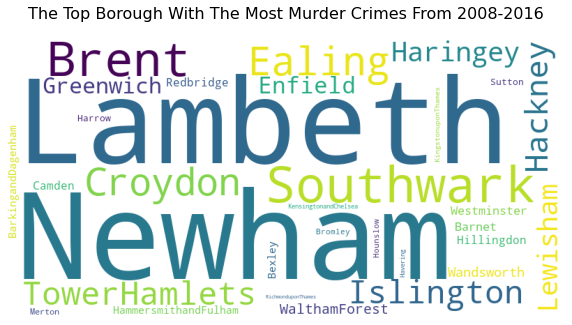

In [53]:
# visualize the word cloud
plt.figure(figsize=(10,8)) 
plt.imshow(wordcloud)
plt.title('The Top Borough With The Most Murder Crimes From 2008-2016', fontsize=16, pad=20)
plt.axis('off')
plt.show()

Berdasarkan visualisasi word cloud di atas, kata Newham terlihat paling besar dan tebal diantara yang lainnya kemudian diikuti oleh Lambeth dan Southwark. Sehingga dapat disimpulkan bahwa Ketiga wilayah tersebut merupakan wilayah dengan tingkat kejatahan pembunuhan tertinggi dari tahun 2008-2016

### Q: What were the boroughs that are included in the high category based on quantile >= 0.75? 

In [54]:
# get the data where year is 2016 then
# group it by borough then sum the value
year_2016 = crimes_only[
    crimes_only['year'] == 2016
].groupby('borough')['value'].sum().reset_index()

Source of the latitude and longitude:
Borough (lat, long)
1. [City of London (51.515556,  -0.093056)](https://geohack.toolforge.org/geohack.php?pagename=City_of_London&params=51_30_56_N_00_05_35_W_region:GB-LDN_type:adm2nd)
2. [Kingston upon Thames (51.408500, -0.306400)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.4085_N_0.3064_W_region:GB_type:city&title=Kingston+upon+Thames)
3. [Richmond upon Thames (51.447900, -0.326000)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.4479_N_0.326_W_region:GB_type:city&title=Richmond+upon+Thames)
4. [Sutton (51.361800, -0.194500)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.3618_N_0.1945_W_region:GB_type:city&title=Sutton)
5. [Bexley (51.454900, 0.150500)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.4549_N_0.1505_E_region:GB_type:city&title=Bexley)
6. [Merton (51.401400, -0.195800)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.4014_N_0.1958_W_region:GB_type:city&title=Merton)
7. [Harrow (51.589800, -0.334600)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.5898_N_0.3346_W_region:GB_type:city&title=Harrow)
8. [Havering (51.581200,  0.183700)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.5812_N_0.1837_E_region:GB_type:city&title=Havering)
9. [Barking and Dagenham (51.560700, 0.155700)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.5607_N_0.1557_E_region:GB_type:city&title=Barking+and+Dagenham)
10. [Kensington and Chelsea (51.502000, -0.194700)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.502_N_0.1947_W_region:GB_type:city&title=Kensington+and+Chelsea)
11. [Greenwich (51.489200, 0.064800](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.4892_N_0.0648_E_region:GB_type:city&title=Greenwich)
12. [Redbridge (51.559000, 0.074100](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.559_N_0.0741_E_region:GB_type:city&title=Redbridge)
13. [Bromley (51.403900, 0.019800)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.4039_N_0.0198_E_region:GB_type:city&title=Bromley)
14. [Hammersmith and Fulham (51.492700, -0.233900)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.4927_N_0.2339_W_region:GB_type:city&title=Hammersmith+and+Fulham)
15. [Hounslow (51.474600, -0.368000)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.4746_N_0.368_W_region:GB_type:city&title=Hounslow)
16. [Enfield (51.653800, -0.079900)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.6538_N_0.0799_W_region:GB_type:city&title=Enfield)
17. [Waltham Forest (51.590800, -0.013400)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.5908_N_0.0134_W_region:GB_type:city&title=Waltham+Forest)
18. [Wandsworth (51.456700, -0.191000)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.4567_N_0.191_W_region:GB_type:city&title=Wandsworth)
19. [Hillingdon (51.544100, -0.476000)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.5441_N_0.476_W_region:GB_type:city&title=Hillingdon)
20. [Barnet (51.625200, -0.151700)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.6252_N_0.1517_W_region:GB_type:city&title=Barnet)
21. [Haringey (51.600000, -0.111900)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.6_N_0.1119_W_region:GB_type:city&title=Haringey)
22. [Lewisham (51.445200, -0.020900)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.4452_N_0.0209_W_region:GB_type:city&title=Lewisham)
23. [Hackney (51.545000, -0.055300)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.545_N_0.0553_W_region:GB_type:city&title=Hackney)
24. [Brent (51.558800, -0.281700)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.5588_N_0.2817_W_region:GB_type:city&title=Brent)
25. [Tower Hamlets (51.509900, -0.005900)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.5099_N_0.0059_W_region:GB_type:city&title=Tower+Hamlets)
26. [Islington (51.541600, -0.102200)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.5416_N_0.1022_W_region:GB_type:city&title=Islington)
27. [Ealing (51.513000, -0.308900)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.513_N_0.3089_W_region:GB_type:city&title=Ealing)
28. [Croydon (51.371400, -0.097700)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.3714_N_0.0977_W_region:GB_type:city&title=Croydon)
29. [Newham (51.507700, 0.046900)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.5077_N_0.0469_E_region:GB_type:city&title=Newham)
30. [Camden (51.529000, -0.125500)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.529_N_0.1255_W_region:GB_type:city&title=Camden)
31. [Southwark (51.503500, -0.080400)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.5035_N_0.0804_W_region:GB_type:city&title=Southwark)
32. [Lambeth (51.460700, -0.116300)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.4607_N_0.1163_W_region:GB_type:city&title=Lambeth)
33. [Westminster (51.497300, -0.137200)](https://geohack.toolforge.org/geohack.php?pagename=List_of_London_boroughs&params=51.4973_N_0.1372_W_region:GB_type:city&title=Westminster)

In [55]:
#list of tuple latitude and longitude of borough in London

lat_long = [('City of London', 51.515556, -0.093056),('Kingston upon Thames', 51.408500, -0.306400),
            ('Richmond upon Thames', 51.447900, -0.326000),('Sutton', 51.361800, -0.194500),('Bexley', 51.454900, 0.150500),
            ('Merton',51.401400, -0.195800),('Harrow', 51.589800, -0.334600),('Havering', 51.581200,  0.183700),
            ('Barking and Dagenham', 51.560700, 0.155700),('Kensington and Chelsea', 51.502000, -0.194700),
            ('Greenwich', 51.489200, 0.064800),('Redbridge', 51.559000, 0.074100),('Bromley', 51.403900, 0.019800),
            ('Hammersmith and Fulham', 51.492700, -0.233900),('Hounslow', 51.474600, -0.368000),('Enfield', 51.653800, -0.079900),
            ('Waltham Forest', 51.590800, -0.013400),('Wandsworth', 51.456700, -0.191000),('Hillingdon', 51.544100, -0.476000),
            ('Barnet', 51.625200, -0.151700),('Haringey', 51.600000, -0.111900),('Lewisham', 51.445200, -0.020900),
            ('Hackney', 51.545000, -0.055300),('Brent', 51.558800, -0.281700),('Tower Hamlets', 51.509900, -0.005900),
            ('Islington', 51.541600, -0.102200),('Ealing', 51.513000, -0.308900),('Croydon', 51.371400, -0.097700),
            ('Newham', 51.507700, 0.046900),('Camden', 51.529000, -0.125500), ('Southwark',51.501720, -0.097960),
            ('Lambeth', 51.457150, -0.123068),('Westminster', 51.497300, -0.137200)]

In [56]:
# create dataframe from list of tuple
df_lat_long = pd.DataFrame(lat_long, columns = ['borough','latitude', 'longitude'])

In [57]:
# merge dataframe year_2016 and df_lat_long
df_merge = pd.merge(year_2016, df_lat_long, on='borough', how='inner')
df_merge

,borough,value,latitude,longitude
0,Barking and Dagenham,16741,51.560700,0.155700
1,Barnet,24684,51.625200,-0.151700
2,Bexley,12840,51.454900,0.150500
3,Brent,26693,51.558800,-0.281700
4,Bromley,20164,51.403900,0.019800
5,Camden,29183,51.529000,-0.125500
6,City of London,178,51.515556,-0.093056
7,Croydon,28712,51.371400,-0.097700
8,Ealing,27127,51.513000,-0.308900
9,Enfield,22485,51.653800,-0.079900


In [58]:
# define the world map centered around London with zoom level = 10
london_map = folium.Map(location=[51.507351, -0.127758], zoom_start=10)

# define plugins marker cluster
mcg = folium.plugins.MarkerCluster(control=False)
# add plugin into london_maps
london_map.add_child(mcg)

# define subgroup "High"
high = folium.plugins.FeatureGroupSubGroup(mcg, "High")
london_map.add_child(high)
# define subgroup "Medium"
medium = folium.plugins.FeatureGroupSubGroup(mcg, "Medium")
london_map.add_child(medium)
# define subgroup "Low"
low = folium.plugins.FeatureGroupSubGroup(mcg, "Low")
london_map.add_child(low)

# zip borough and value into label
labels = list(zip(df_merge['borough'], df_merge['value']))

# looping through df_merge['latitude'], df_merge['longitude'], df_merge['value'], and labels    
for lat, long, value, label in zip(df_merge['latitude'], df_merge['longitude'], df_merge['value'], labels):
    # if value bigger than and equal to quantile(0.75) ...
    if value >= df_merge['value'].quantile(.75):
        # ... then create marker and add it to high subgroup
        folium.Marker([lat, long], popup=label[0]+' ('+str(label[1])+')').add_to(high)
    # else if value less than and equal to quantile(0.25) ...
    elif value <= df_merge['value'].quantile(.25):
        # ... then create marker and add it to low subgroup
        folium.Marker([lat, long], popup=label[0]+' ('+str(label[1])+')').add_to(low)
    else:
        # else create marker and add it to medium subgroup
        folium.Marker([lat, long], popup=label[0]+' ('+str(label[1])+')').add_to(medium)

# add layer control to london_map
folium.LayerControl(collapsed=False).add_to(london_map)

# show map
london_map

Berdasarkan peta di atas dapat diketahui bahwa pada tahun 2016 terdapat 9 wilayah yang termasuk ke dalam wilayah yang total kejahatannya rendah (low), 15 wilayah dengan total sedang (medium), dan 9 wilayah dengan total tinggi. Kesembilan wilayah yang tinggi tersebut adalah Croydon, Lambeth, Hackney,  Camden, Haringey, Westminster, Southwark, Newham, dan Tower Hamlets. 

### Conclusion

Dari hasil eksplorasi di atas dapat diketahui bahwa tingkat kriminalitas di London sempat mengalami penurunan tetapi kembali naik hingga tahun 2016. Wilayah yang memiliki kriminalitas tertinggi adalah Westminster, hal ini dapat disebabkan oleh nature dari wilayah pariwisata. Selain Westminster terdapat wilayah lain yang kriminalitasnya juga tinggi seperti Lambeth, Southwark, Camden, Newham, Islington, Croydon, Hackney, Haringey, dan Tower Hamlets. Beberapa wilayah tersebut merupakan wilayah yang termasuk sebagai tempat tourism yang kerap dikunjungi di London. Mayoritas kategori kriminal utama yang dilaporkan adalah Theft & Handling kemudian diikuti oleh Violence against the person. Pada kategori thef & handling, kejahatan yang paling sering dilaporkan adalah Other theft dan pada violence against the person adalah assault with injury dan harassment. Untuk kategori theft kemungkinan penyebab masalahnya adalah natur dari area pariwisata. Sedangkan violence perlu ditelaah lebih dalam penyebabnya karena banyak hal dapat memicu violence. 

Walaupun sulit untuk mengetahui kapan terjadinya kejahatan tetapi tingkat kriminalitas ini harus di perkecil agar warga London dan juga turis dapat merasa aman. Hal-hal yang mungkin dapat dipertimbangkan untuk meningkatkan keamanan adalah:
1. Mengatur akses di setiap tempat pariwisata termasuk jalannya.
2. Menambah petugas keamanan di setiap tempat
3. Melakukan pelatihan terhadap petugas keamanan
4. Membatasi akses ke alat kejahatan
5. Pemasangan CCTV di tempat-tempat kejadian yang sering di laporkan kejahatan.
6. Mengurangi provokasi seperti pada klub malam dan acara olahraga, mengubah manajemen bar (dari pelatihan staf dan perubahan tanggung jawab bartender) adalah metode yang menjanjikan untuk pencegahan pelanggaran terkait drinking. Selain itu memisahkan pendukung lawan di acara olahraga dan menghindari kemacetan di jalan setelah acara
7. Melakukan kampanye tentang bagaimana melingdungi diri sendiri dan keluarga ketika terjadi berbagai kejahatan